In [427]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [428]:
import os
import pandas as pd
path = "/content/drive/MyDrive/SportBetting/Data2"
dir_list = os.listdir(path)
allData = [file for file in dir_list if "-" in file and ".csv" in file]
allData.remove("2000-2001.csv")
df = pd.DataFrame()

# cols = ["B365H","B365D","B365A","BSH","BSD","BSA","BWH","BWD","BWA","GBH","GBD","GBA","IWH","IWD","IWA","LBH","LBD","LBA","PSH","PSD","PSA","SOH","SOD","SOA","SBH","SBD","SBA","SJH","SJD","SJA","SYH","SYD","SYA","VCH","VCD","VCA","WHH","WHD","WHA"]

# cols = ["HomeTeam","AwayTeam","FTR","Date","B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","PSH","PSD","PSA","WHH","WHD","WHA","VCH","VCD","VCA"]
# cols = ["HomeTeam","AwayTeam","FTR","Date","B365H","B365D","B365A"]
cols = ["HomeTeam","AwayTeam","FTR","Date","WHH","WHD","WHA"]
for file in allData:
    pathFile = os.path.join(path,file)
    try:
        data = pd.read_csv(pathFile,error_bad_lines=False,usecols = cols)
        data['Date']= pd.to_datetime(data['Date'])
        df = df.append(data)
    except:
        print(file)
start_date = "2000-01-01"
end_date = "2021-12-31"
mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
df = df.loc[mask]
df['Date']= pd.to_datetime(df['Date'])
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


2004-2005.csv


,Date,HomeTeam,AwayTeam,FTR,WHH,WHD,WHA
0,2016-08-13,Burnley,Swansea,A,2.50,3.20,2.90
1,2016-08-13,Crystal Palace,West Brom,A,2.05,3.10,4.00
2,2016-08-13,Everton,Tottenham,D,3.10,3.10,2.40
3,2016-08-13,Hull,Leicester,H,4.20,3.25,1.95
4,2016-08-13,Man City,Sunderland,H,1.25,5.50,13.00
...,...,...,...,...,...,...,...
179,2021-01-19,West Ham,West Brom,H,1.57,3.90,6.50
180,2021-01-19,Leicester,Chelsea,H,3.00,3.40,2.40
181,2021-01-20,Man City,Aston Villa,H,1.25,6.00,12.00
182,2021-01-20,Fulham,Man United,A,6.50,4.20,1.53


In [429]:
df = df.dropna()

In [430]:
from sklearn.model_selection import train_test_split

X = df.drop(["HomeTeam","AwayTeam","FTR"],axis = 1)

y = df["FTR"]

X_trainDate, X_testDate, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = X_trainDate.drop(["Date"],axis =1 )
X_test = X_testDate.drop(["Date"],axis =1 )

In [431]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rfc=RandomForestClassifier(random_state=42)
# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,n_jobs= -1, verbose = True)
# CV_rfc.fit( X_train,y_train)


rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [433]:
clf = rf_random.best_estimator_
rf_random.best_estimator_

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                       n_estimators=400, random_state=42)

In [434]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=4, n_estimators=1600, random_state=42)
scores = cross_val_score(clf, X_train,y_train, cv=3)
scores

array([0.54485488, 0.52968338, 0.53531353])

In [435]:
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.6006157906311854

In [436]:
import numpy as np
predictProba =[]
Proba = []
for el in clf.predict_proba(X_train):
  choose = max(el)
  indexChoice = list(el).index(choose)

  if indexChoice == 0:
    predictProba.append("A")
  if indexChoice == 1:
    predictProba.append("D")
  if indexChoice == 2:
    predictProba.append("H")
  
  Proba.append(choose)

In [437]:
X_trainDate["bet"] = predictProba
X_trainDate["Proba"] = Proba
X_trainDate["FTR"] = y_train
X_trainDate["result"] = X_trainDate["bet"] == X_trainDate["FTR"]
X_trainDate

,Date,WHH,WHD,WHA,bet,Proba,FTR,result
249,2006-11-02,7.00,4.00,1.36,A,0.637465,H,False
361,2008-03-05,1.30,4.33,8.00,H,0.646912,H,True
288,2008-03-15,1.22,4.80,10.00,H,0.763714,D,False
83,2011-10-22,2.00,3.30,3.75,H,0.431386,D,False
248,2013-03-02,1.85,3.50,4.20,H,0.559255,D,False
...,...,...,...,...,...,...,...,...
352,2014-04-26,1.91,3.50,4.00,H,0.582563,H,True
253,2003-01-02,3.75,3.30,1.80,A,0.424102,A,True
288,2003-05-03,2.80,3.20,2.20,H,0.447192,H,True
72,2017-10-14,2.75,3.20,2.75,A,0.375811,D,False


In [438]:
def AddKellyCriterion(row):
  bet = row["bet"]
  if bet == "H":
    odd = row["WHH"]
  elif bet == "D": 
    odd = row["WHD"] 
  else: 
    odd = row["WHA"]


  B = odd - 1
  P = row["Proba"]
  Q = 1- P
  row["Kelly"] = (B*P - Q)/B

  return row

X_trainDate = X_trainDate.apply(AddKellyCriterion,axis =1)
X_trainDate

,Date,WHH,WHD,WHA,bet,Proba,FTR,result,Kelly
249,2006-11-02,7.00,4.00,1.36,A,0.637465,H,False,-0.369577
361,2008-03-05,1.30,4.33,8.00,H,0.646912,H,True,-0.530048
288,2008-03-15,1.22,4.80,10.00,H,0.763714,D,False,-0.310312
83,2011-10-22,2.00,3.30,3.75,H,0.431386,D,False,-0.137228
248,2013-03-02,1.85,3.50,4.20,H,0.559255,D,False,0.040731
...,...,...,...,...,...,...,...,...,...
352,2014-04-26,1.91,3.50,4.00,H,0.582563,H,True,0.123841
253,2003-01-02,3.75,3.30,1.80,A,0.424102,A,True,-0.295771
288,2003-05-03,2.80,3.20,2.20,H,0.447192,H,True,0.140077
72,2017-10-14,2.75,3.20,2.75,A,0.375811,D,False,0.019131


In [439]:
print(len(X_trainDate[X_trainDate["Kelly"] > 0])/len(X_trainDate))
X_trainDate = X_trainDate[X_trainDate["Kelly"] > 0]
X_trainDate = X_trainDate.sort_values(by=['Date',"Kelly"],ascending = [True,False])
X_trainDate

0.5594897734770178


,Date,WHH,WHD,WHA,bet,Proba,FTR,result,Kelly
227,2001-02-04,1.25,4.50,10.00,H,0.889915,H,True,0.449574
228,2001-02-04,4.50,3.30,1.66,A,0.610538,A,True,0.020444
349,2001-05-04,3.75,3.25,1.85,H,0.437719,H,True,0.233254
351,2001-05-04,1.44,3.60,7.00,H,0.754299,H,True,0.195886
353,2001-05-04,2.10,3.25,3.00,D,0.378929,D,True,0.102898
...,...,...,...,...,...,...,...,...,...
161,2021-03-01,5.25,3.90,1.65,A,0.658973,A,True,0.134316
162,2021-03-01,3.10,3.50,2.25,H,0.389930,A,False,0.099421
288,2021-03-04,2.40,3.10,2.60,H,0.427898,H,True,0.019254
56,2021-09-03,2.20,2.87,3.10,H,0.458921,D,False,0.008021


In [440]:
import numpy as np
def softmax(vector):
	e = np.exp(vector)
	return e / e.sum()
 
doneList = []
betDatePortion = []
odds = []
for row in X_trainDate.iterrows():

  bet = row[1]["bet"]
  if bet == "H":
    odd = row[1]["WHH"]
  elif bet == "D":
    odd = row[1]["WHD"]
  else:
    odd = row[1]["WHA"]
  odds.append(odd)

  date = row[1]["Date"]
  if date in doneList:
    continue
  data = X_trainDate[X_trainDate["Date"] == date]
  
  if len(data) == 1:
    betDatePortion.append(row[1]["Kelly"])
  else:
    for i in softmax(data["Kelly"]):
      betDatePortion.append(i)

  doneList.append(date)
  
X_trainDate["betDatePortion"] = betDatePortion
X_trainDate["odd"] = odds
X_trainDate

,Date,WHH,WHD,WHA,bet,Proba,FTR,result,Kelly,betDatePortion,odd
227,2001-02-04,1.25,4.50,10.00,H,0.889915,H,True,0.449574,0.605666,1.25
228,2001-02-04,4.50,3.30,1.66,A,0.610538,A,True,0.020444,0.394334,1.66
349,2001-05-04,3.75,3.25,1.85,H,0.437719,H,True,0.233254,0.351976,3.75
351,2001-05-04,1.44,3.60,7.00,H,0.754299,H,True,0.195886,0.339066,1.44
353,2001-05-04,2.10,3.25,3.00,D,0.378929,D,True,0.102898,0.308958,3.25
...,...,...,...,...,...,...,...,...,...,...,...
161,2021-03-01,5.25,3.90,1.65,A,0.658973,A,True,0.134316,0.508723,1.65
162,2021-03-01,3.10,3.50,2.25,H,0.389930,A,False,0.099421,0.491277,3.10
288,2021-03-04,2.40,3.10,2.60,H,0.427898,H,True,0.019254,0.019254,2.40
56,2021-09-03,2.20,2.87,3.10,H,0.458921,D,False,0.008021,0.008021,2.20


In [441]:
budgetList =[]
amountList = []

budget = 10
countAdd = 0
countWithDrawal = 0
WithDrawLimit = 1000
WithDrawalList = []
for date in doneList:
  data = X_trainDate[X_trainDate["Date"] == date]
  gain = sum(data["betDatePortion"]*budget*data["result"]*(data["odd"]-1))
  lost = -sum((data["result"] == False)*data["betDatePortion"]*budget)
  budget = budget + lost + gain
  budgetList.append(budget)
  amountList.append(lost + gain)
  if budget < 1:
    budget = 10
    countAdd +=1
  if budget > WithDrawLimit:
    WithDrawalList.append(budget - (budget % WithDrawLimit))
    budget = (budget % WithDrawLimit)
    countWithDrawal +=1
    

In [442]:
countAdd

33

In [443]:
countWithDrawal

77

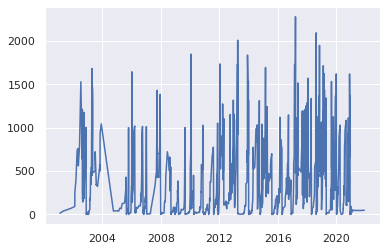

In [444]:
import seaborn as sns
sns.set_theme(style="darkgrid")

sns.lineplot(x=doneList, y=budgetList)

# print("Mean " ,mean(budgetTrack))
# print("Std " ,budgetTrack.std())

In [445]:
budget - countAdd*10 + sum(WithDrawalList)

79718.39068113941

In [446]:
# ----------------------------------------------------------------------------------------------------------

In [447]:
import numpy as np
predictProba =[]
Proba = []
for el in clf.predict_proba(X_test):
  choose = max(el)
  indexChoice = list(el).index(choose)

  if indexChoice == 0:
    predictProba.append("A")
  if indexChoice == 1:
    predictProba.append("D")
  if indexChoice == 2:
    predictProba.append("H")
  
  Proba.append(choose)

In [448]:
X_testDate["bet"] = predictProba
X_testDate["Proba"] = Proba
X_testDate["FTR"] = y_test
X_testDate["result"] = X_testDate["bet"] == X_testDate["FTR"]
X_testDate

,Date,WHH,WHD,WHA,bet,Proba,FTR,result
191,2018-12-29,2.05,3.20,4.00,H,0.571109,H,True
88,2005-10-22,2.05,3.00,3.30,H,0.644818,H,True
230,2018-01-20,1.50,4.33,7.00,H,0.550474,H,True
55,2015-09-19,2.50,3.00,3.00,H,0.391049,D,False
283,2012-03-18,9.00,4.50,1.36,A,0.852454,A,True
...,...,...,...,...,...,...,...,...
175,2002-12-15,1.72,3.40,4.00,H,0.585514,A,False
29,2014-08-31,2.70,3.00,2.80,D,0.365520,A,False
132,2008-11-22,3.40,3.25,2.00,A,0.548299,H,False
233,2003-01-18,1.66,3.40,4.33,H,0.509825,H,True


In [449]:
def AddKellyCriterion(row):
  bet = row["bet"]
  if bet == "H":
    odd = row["WHH"]
  elif bet == "D": 
    odd = row["WHD"] 
  else: 
    odd = row["WHA"]


  B = odd - 1
  P = row["Proba"]
  Q = 1- P
  row["Kelly"] = (B*P - Q)/B

  return row

X_testDate = X_testDate.apply(AddKellyCriterion,axis =1)
X_testDate

,Date,WHH,WHD,WHA,bet,Proba,FTR,result,Kelly
191,2018-12-29,2.05,3.20,4.00,H,0.571109,H,True,0.162641
88,2005-10-22,2.05,3.00,3.30,H,0.644818,H,True,0.306550
230,2018-01-20,1.50,4.33,7.00,H,0.550474,H,True,-0.348577
55,2015-09-19,2.50,3.00,3.00,H,0.391049,D,False,-0.014919
283,2012-03-18,9.00,4.50,1.36,A,0.852454,A,True,0.442605
...,...,...,...,...,...,...,...,...,...
175,2002-12-15,1.72,3.40,4.00,H,0.585514,A,False,0.009838
29,2014-08-31,2.70,3.00,2.80,D,0.365520,A,False,0.048280
132,2008-11-22,3.40,3.25,2.00,A,0.548299,H,False,0.096598
233,2003-01-18,1.66,3.40,4.33,H,0.509825,H,True,-0.232864


In [450]:
print(len(X_testDate[X_testDate["Kelly"] > 0])/len(X_testDate))
X_testDate = X_testDate[X_testDate["Kelly"] > 0]
X_testDate = X_testDate.sort_values(by=['Date',"Kelly"],ascending = [True,False])
X_testDate

0.5316964285714286


,Date,WHH,WHD,WHA,bet,Proba,FTR,result,Kelly
350,2001-05-04,1.73,3.5,4.00,H,0.615628,D,False,0.089090
104,2001-11-03,1.50,3.4,6.00,H,0.737128,D,False,0.211384
35,2002-01-09,2.87,3.0,2.25,H,0.479650,D,False,0.201388
35,2002-01-09,2.87,3.0,2.25,H,0.479650,D,False,0.201388
156,2002-01-12,2.25,3.1,2.80,H,0.455767,A,False,0.020380
...,...,...,...,...,...,...,...,...,...
159,2021-02-01,2.70,3.1,2.80,D,0.403208,D,True,0.119021
163,2021-04-01,5.00,4.2,1.63,A,0.722414,H,False,0.281801
166,2021-12-01,2.45,3.1,3.10,D,0.384105,A,False,0.090822
164,2021-12-01,2.45,3.1,3.10,D,0.384105,H,False,0.090822


In [451]:
import numpy as np
def softmax(vector):
	e = np.exp(vector)
	return e / e.sum()
 
doneList = []
betDatePortion = []
odds = []
for row in X_testDate.iterrows():

  bet = row[1]["bet"]
  if bet == "H":
    odd = row[1]["WHH"]
  elif bet == "D":
    odd = row[1]["WHD"]
  else:
    odd = row[1]["WHA"]
  odds.append(odd)

  date = row[1]["Date"]
  if date in doneList:
    continue
  data = X_testDate[X_testDate["Date"] == date]
  
  if len(data) == 1:
    betDatePortion.append(row[1]["Kelly"])
  else:
    for i in softmax(data["Kelly"]):
      betDatePortion.append(i)

  doneList.append(date)
  
X_testDate["betDatePortion"] = betDatePortion
X_testDate["odd"] = odds
X_testDate

,Date,WHH,WHD,WHA,bet,Proba,FTR,result,Kelly,betDatePortion,odd
350,2001-05-04,1.73,3.5,4.00,H,0.615628,D,False,0.089090,0.089090,1.73
104,2001-11-03,1.50,3.4,6.00,H,0.737128,D,False,0.211384,0.211384,1.50
35,2002-01-09,2.87,3.0,2.25,H,0.479650,D,False,0.201388,0.500000,2.87
35,2002-01-09,2.87,3.0,2.25,H,0.479650,D,False,0.201388,0.500000,2.87
156,2002-01-12,2.25,3.1,2.80,H,0.455767,A,False,0.020380,0.500000,2.25
...,...,...,...,...,...,...,...,...,...,...,...
159,2021-02-01,2.70,3.1,2.80,D,0.403208,D,True,0.119021,0.119021,3.10
163,2021-04-01,5.00,4.2,1.63,A,0.722414,H,False,0.281801,0.281801,1.63
166,2021-12-01,2.45,3.1,3.10,D,0.384105,A,False,0.090822,0.500000,3.10
164,2021-12-01,2.45,3.1,3.10,D,0.384105,H,False,0.090822,0.500000,3.10


In [452]:
budgetList =[]
amountList = []

budget = 10
countAdd = 0
countWithDrawal = 0
WithDrawLimit = 1000
WithDrawalList = []
for date in doneList:
  data = X_testDate[X_testDate["Date"] == date]
  gain = sum(data["betDatePortion"]*budget*data["result"]*(data["odd"]-1))
  lost = -sum((data["result"] == False)*data["betDatePortion"]*budget)
  budget = budget + lost + gain
  budgetList.append(budget)
  amountList.append(lost + gain)
  if budget < 1:
    budget = 10
    countAdd +=1
  if budget > WithDrawLimit:
    WithDrawalList.append(budget - (budget % WithDrawLimit))
    budget = (budget % WithDrawLimit)
    countWithDrawal +=1
    

In [453]:
countAdd

58

In [454]:
countWithDrawal

3

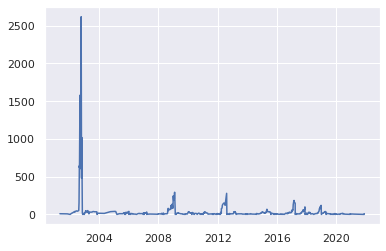

In [455]:
import seaborn as sns
sns.set_theme(style="darkgrid")

sns.lineplot(x=doneList, y=budgetList)

In [456]:
budget - countAdd*10 + sum(WithDrawalList)

3430.5494578717294

In [457]:
WithDrawalList

[1000.0, 2000.0, 1000.0]